In [1]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
batch_size = 64 # in each iteration, we consider 32 training examples at once
num_epochs = 100 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the dense layer with probability 0.5
hidden_size = 512 # the dense layer will have 512 neurons

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data
num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') / 255.0
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_train) # Normalise data to [0, 1] range
Y_train = to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = to_categorical(y_test, num_classes=10)

In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# Гиперпараметры (примерные значения)
depth, height, width = 3, 32, 32  # Например, как в CIFAR-10
conv_depth_1 = 32
conv_depth_2 = 64
kernel_size = 3
pool_size = 2
drop_prob_1 = 0.25
drop_prob_2 = 0.5
hidden_size = 512
num_classes = 10
batch_size = 64
num_epochs = 100

inp = Input(shape=X_train.shape[1:])  # В Keras обычно (height, width, channels)

# Conv [32] -> Conv [32] -> Pool -> Dropout
x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)
x = Dropout(drop_prob_1)(x)

# Conv [64] -> Conv [64] -> Pool -> Dropout
x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)
x = Dropout(drop_prob_1)(x)

# Flatten -> Dense -> Dropout -> Dense
x = Flatten()(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dropout(drop_prob_2)(x)
out = Dense(num_classes, activation='softmax')(x)

# Сборка модели
model_3 = Model(inputs=inp, outputs=out)
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение
history_3 = model_3.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          verbose=1,
          validation_split=0.1)

# Оценка
model_3.evaluate(X_test, Y_test, verbose=1)


Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.3329 - loss: 1.8107 - val_accuracy: 0.5814 - val_loss: 1.1684
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.5798 - loss: 1.1774 - val_accuracy: 0.6932 - val_loss: 0.8886
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.6588 - loss: 0.9688 - val_accuracy: 0.6842 - val_loss: 0.9113
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.6951 - loss: 0.8654 - val_accuracy: 0.7512 - val_loss: 0.7255
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.7258 - loss: 0.7808 - val_accuracy: 0.7534 - val_loss: 0.7197
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.7464 - loss: 0.7236 - val_accuracy: 0.7622 - val_loss: 0.7007
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.7665 - loss: 0.6700 - val_accuracy: 0.7660 - val_loss: 0.6776
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.7805 - loss: 0

[0.8798766732215881, 0.7971000075340271]

In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Гиперпараметры
depth, height, width = 3, 32, 32
conv_depth_1 = 32
conv_depth_2 = 64
kernel_size = 3
pool_size = 2
hidden_size = 512
num_classes = 10
batch_size = 64
num_epochs = 100

# Вход
inp = Input(shape=X_train.shape[1:])  # (32, 32, 3)

# Conv [32] -> Conv [32] -> Pool
x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)

# Conv [64] -> Conv [64] -> Pool
x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)

# Flatten -> Dense -> Dense
x = Flatten()(x)
x = Dense(hidden_size, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)

# Сборка модели
model_3_without_dropout = Model(inputs=inp, outputs=out)
model_3_without_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение с сохранением истории
history_3_without_dropout = model_3_without_dropout.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    verbose=1,
    validation_split=0.1
)

# Оценка
model_3_without_dropout.evaluate(X_test, Y_test, verbose=1)

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.4004 - loss: 1.6340 - val_accuracy: 0.6202 - val_loss: 1.0564
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.6553 - loss: 0.9669 - val_accuracy: 0.6918 - val_loss: 0.8764
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.7471 - loss: 0.7212 - val_accuracy: 0.7272 - val_loss: 0.8146
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8071 - loss: 0.5591 - val_accuracy: 0.7492 - val_loss: 0.7554
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8676 - loss: 0.3821 - val_accuracy: 0.7480 - val_loss: 0.8037
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.9223 - loss: 0.2283 - val_accuracy: 0.7614 - val_loss: 0.9183
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.9516 - loss: 0.1401 - val_accuracy: 0.7638 - val_loss: 1.0119
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.9670 - loss: 0

[4.631298065185547, 0.7311000227928162]

In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Гиперпараметры
batch_size = 64
num_epochs = 100
kernel_size = 5  # теперь 5x5
pool_size = 2
conv_depth_1 = 32
conv_depth_2 = 64
drop_prob_1 = 0.25
drop_prob_2 = 0.5
hidden_size = 512

# Загрузка данных
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_classes = np.unique(y_train).shape[0]

# Предобработка данных
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

# Создание модели
inp = Input(shape=X_train.shape[1:])  # (32, 32, 3)

x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)
x = Dropout(drop_prob_1)(x)

x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)
x = Dropout(drop_prob_1)(x)

x = Flatten()(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dropout(drop_prob_2)(x)
out = Dense(num_classes, activation='softmax')(x)

# Сборка модели
model_5 = Model(inputs=inp, outputs=out)
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение с сохранением истории
history_5 = model_5.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    verbose=1,
    validation_split=0.1
)

# Оценка
test_loss, test_accuracy = model_5.evaluate(X_test, Y_test, verbose=1)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")


Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 79ms/step - accuracy: 0.3106 - loss: 1.8526 - val_accuracy: 0.5098 - val_loss: 1.3736
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 78ms/step - accuracy: 0.5501 - loss: 1.2586 - val_accuracy: 0.6614 - val_loss: 0.9903
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.6275 - loss: 1.0570 - val_accuracy: 0.6928 - val_loss: 0.8826
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.6734 - loss: 0.9249 - val_accuracy: 0.7182 - val_loss: 0.8295
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.7075 - loss: 0.8395 - val_accuracy: 0.7366 - val_loss: 0.7656
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.7240 - loss: 0.7858 - val_accuracy: 0.7532 - val_loss: 0.7203
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - accuracy: 0.7412 - loss: 0.7340 - val_accuracy: 0.7640 - val_loss: 0.7042
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.7605 - loss: 0

In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Гиперпараметры
batch_size = 64
num_epochs = 100
kernel_size = 7
pool_size = 2
conv_depth_1 = 32
conv_depth_2 = 64
drop_prob_1 = 0.25
drop_prob_2 = 0.5
hidden_size = 512

# Загрузка данных
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_classes = np.unique(y_train).shape[0]

# Предобработка данных
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

# Создание модели
inp = Input(shape=X_train.shape[1:])  # (32, 32, 3)

x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
x = Conv2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)
x = Dropout(drop_prob_1)(x)

x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(pool_size, pool_size))(x)
x = Dropout(drop_prob_1)(x)

x = Flatten()(x)
x = Dense(hidden_size, activation='relu')(x)
x = Dropout(drop_prob_2)(x)
out = Dense(num_classes, activation='softmax')(x)

# Сборка модели
model_7 = Model(inputs=inp, outputs=out)
model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение с сохранением истории
history_7 = model_7.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    verbose=1,
    validation_split=0.1
)

# Оценка
test_loss, test_accuracy = model_7.evaluate(X_test, Y_test, verbose=1)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")


Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 129ms/step - accuracy: 0.2702 - loss: 1.9591 - val_accuracy: 0.4664 - val_loss: 1.4523
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.4754 - loss: 1.4501 - val_accuracy: 0.5628 - val_loss: 1.2085
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.5420 - loss: 1.2709 - val_accuracy: 0.5950 - val_loss: 1.1310
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.5909 - loss: 1.1430 - val_accuracy: 0.6240 - val_loss: 1.0664
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.6257 - loss: 1.0589 - val_accuracy: 0.6642 - val_loss: 0.9796
Epoch 6/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.6539 - loss: 0.9854 - val_accuracy: 0.6758 - val_loss: 0.9476
Epoch 7/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 91s 130ms/step - accuracy: 0.6822 - loss: 0.9138 - val_accuracy: 0.6954 - val_loss: 0.8835
Epoch 8/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.6854 -

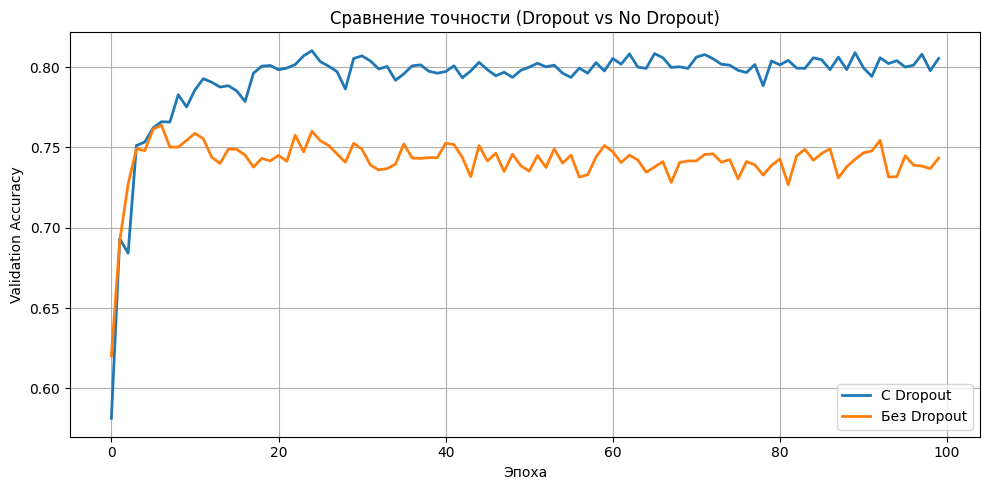

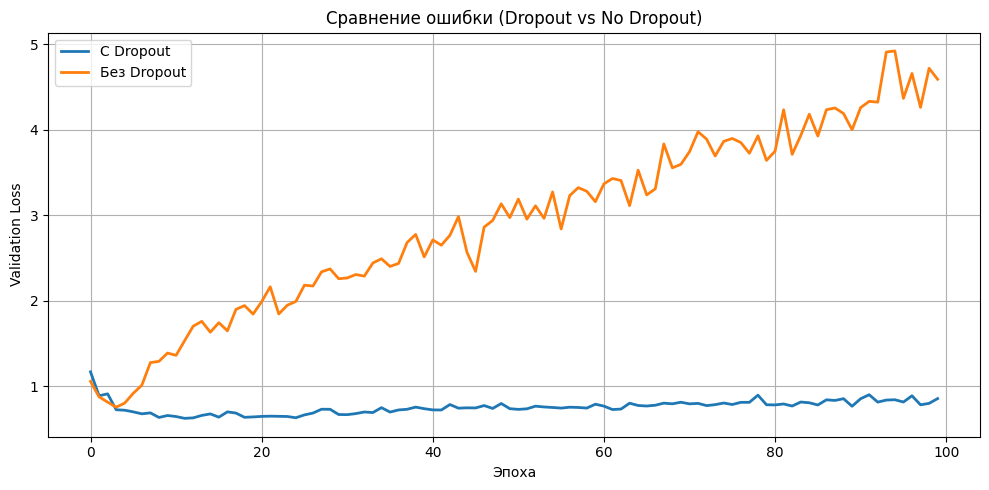

In [11]:
import matplotlib.pyplot as plt

# --- Сравнение финальной точности и ошибки на тесте ---
loss_with, acc_with = model_3.evaluate(X_test, Y_test, verbose=0)
loss_without, acc_without = model_3_without_dropout.evaluate(X_test, Y_test, verbose=0)

# --- График валидационной точности (val_accuracy) ---
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['val_accuracy'], label='С Dropout', linewidth=2)
plt.plot(history_3_without_dropout.history['val_accuracy'], label='Без Dropout', linewidth=2)
plt.xlabel('Эпоха')
plt.ylabel('Validation Accuracy')
plt.title('Сравнение точности (Dropout vs No Dropout)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- График валидационных потерь (val_loss) ---
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['val_loss'], label='С Dropout', linewidth=2)
plt.plot(history_3_without_dropout.history['val_loss'], label='Без Dropout', linewidth=2)
plt.xlabel('Эпоха')
plt.ylabel('Validation Loss')
plt.title('Сравнение ошибки (Dropout vs No Dropout)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


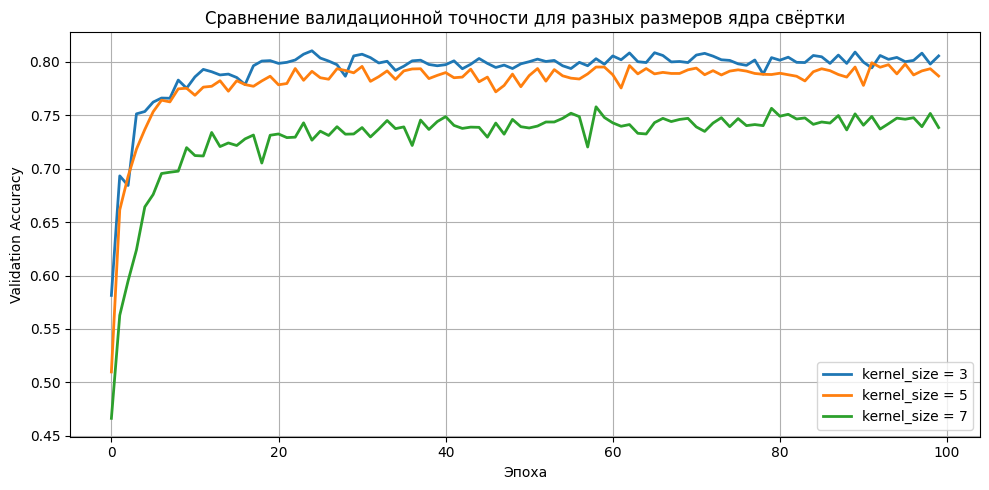

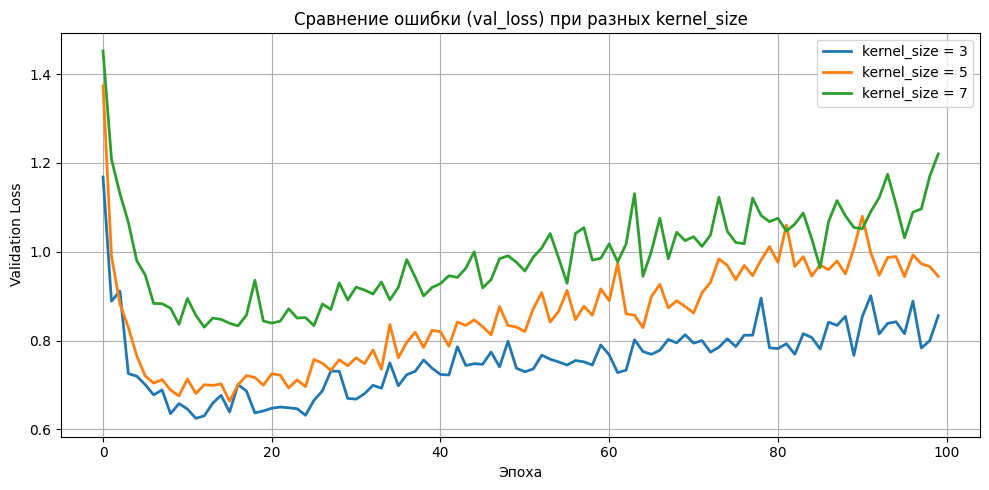

In [10]:
import matplotlib.pyplot as plt

# --- Оценка точности и потерь на тесте ---
loss_3, acc_3 = model_3.evaluate(X_test, Y_test, verbose=0)
loss_5, acc_5 = model_5.evaluate(X_test, Y_test, verbose=0)
loss_7, acc_7 = model_7.evaluate(X_test, Y_test, verbose=0)

# --- График: точность на валидации ---
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['val_accuracy'], label='kernel_size = 3', linewidth=2)
plt.plot(history_5.history['val_accuracy'], label='kernel_size = 5', linewidth=2)
plt.plot(history_7.history['val_accuracy'], label='kernel_size = 7', linewidth=2)
plt.xlabel('Эпоха')
plt.ylabel('Validation Accuracy')
plt.title('Сравнение валидационной точности для разных размеров ядра свёртки')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- График: ошибка на валидации ---
plt.figure(figsize=(10, 5))
plt.plot(history_3.history['val_loss'], label='kernel_size = 3', linewidth=2)
plt.plot(history_5.history['val_loss'], label='kernel_size = 5', linewidth=2)
plt.plot(history_7.history['val_loss'], label='kernel_size = 7', linewidth=2)
plt.xlabel('Эпоха')
plt.ylabel('Validation Loss')
plt.title('Сравнение ошибки (val_loss) при разных kernel_size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
